<a href="https://colab.research.google.com/github/nicorunini/CCADMACL_-COM231-_PROJECT/blob/main/Kmeans_baseline_and_optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv("/content/roblox_games_data.csv", encoding="utf-8")
df.head()


Unnamed: 0                 Date  Active Users  Favorites Total Visits  \
0           0  2022-02-22 09:28:23          1557     330071       50.9M+   
1           1  2022-02-22 09:28:24          3208     137809       30.9M+   
2           2  2022-02-22 09:28:24          2091    2556671      725.7M+   
3           3  2022-02-22 09:28:25          6235     711635      461.2M+   
4           4  2022-02-22 09:28:26          7273     247852       77.2M+   

  Date Created Last Updated  Server Size       Genre  \
0     5/5/2021    2/19/2022            8    Building   
1    4/22/2019    2/21/2022           12  All Genres   
2   10/16/2015     2/4/2022           20   Adventure   
3    2/25/2018    2/10/2022           12    Fighting   
4   10/12/2019    2/22/2022           15         RPG   

                                               Title               Creator  \
0        [TIER8]FactorySimulatorByGamingGloveStudios  Gaming Glove Studios   
1  [NEWBOSS]AnimeClickersSimulatorBySimpleSimulators     Simple Simulators   
2        (Cosmiore☄️)LoomianLegacyByLlamaTrainStudio    Llama Train Studio   
3  [CHRISTMAS+GODUSOPP+KIRITO]ABAByDogsStudios:South   Dogs Studios: South   
4                            DeepwokenByVowsbytheSea       Vows by the Sea   

       gameID       Category  \
0  6769764667  Most Engaging   
1  3102144307  Most Engaging   
2   306964494  Most Engaging   
3  1458767429  Most Engaging   
4  4111023553  Most Engaging   

                                                 URL  \
0  https://www.roblox.com/games/refer?IsLargeGame...   
1  https://www.roblox.com/games/refer?IsLargeGame...   
2  https://www.roblox.com/games/refer?IsLargeGame...   
3  https://www.roblox.com/games/refer?IsLargeGame...   
4  https://www.roblox.com/games/refer?IsLargeGame...   

                                         Description  
0  🏭Harvest the worlds resources to build up your...  
1  Welcome to Anime Clickers! 👍New Code at 100k L...  
2  Loomian Legacy is an in-development MMO Advent...  
3  ANIME BATTLE ARENA Controls: Shift: Sprint Q: ...  
4  >> Deepwoken is a difficult game with permanen...

In [ ]:
df_clean = df.copy()

# Drop irrelevant columns
drop_cols = ['Unnamed: 0', 'Creator', 'Description', 'URL']
df_clean.drop(columns=drop_cols, inplace=True)

# Convert Total Visits to numeric
df_clean['Total Visits'] = (
    df_clean['Total Visits']
    .astype(str)
    .str.replace('+', '', regex=False)
    .str.replace('B', 'e9', regex=False)
    .str.replace('M', 'e6', regex=False)
    .str.replace('K', 'e3', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

numeric_cols = [
    'Active Users',
    'Favorites',
    'Total Visits',
    'Server Size'
]

df_clean[numeric_cols] = df_clean[numeric_cols].apply(
    pd.to_numeric, errors='coerce'
)

df_model = df_clean.dropna(subset=numeric_cols)


In [ ]:
df_clean.head()


Date  Active Users  Favorites  Total Visits Date Created  \
0  2022-02-22 09:28:23          1557     330071    50900000.0     5/5/2021   
1  2022-02-22 09:28:24          3208     137809    30900000.0    4/22/2019   
2  2022-02-22 09:28:24          2091    2556671   725700000.0   10/16/2015   
3  2022-02-22 09:28:25          6235     711635   461200000.0    2/25/2018   
4  2022-02-22 09:28:26          7273     247852    77200000.0   10/12/2019   

  Last Updated  Server Size       Genre  \
0    2/19/2022            8    Building   
1    2/21/2022           12  All Genres   
2     2/4/2022           20   Adventure   
3    2/10/2022           12    Fighting   
4    2/22/2022           15         RPG   

                                               Title      gameID  \
0        [TIER8]FactorySimulatorByGamingGloveStudios  6769764667   
1  [NEWBOSS]AnimeClickersSimulatorBySimpleSimulators  3102144307   
2        (Cosmiore☄️)LoomianLegacyByLlamaTrainStudio   306964494   
3  [CHRISTMAS+GODUSOPP+KIRITO]ABAByDogsStudios:South  1458767429   
4                            DeepwokenByVowsbytheSea  4111023553   

        Category  
0  Most Engaging  
1  Most Engaging  
2  Most Engaging  
3  Most Engaging  
4  Most Engaging

In [ ]:
features_raw = [
    'Active Users',
    'Favorites',
    'Total Visits',
    'Server Size'
]

X_raw = df_model[features_raw]


In [ ]:
scaler_raw = StandardScaler()
X_raw_scaled = scaler_raw.fit_transform(X_raw)


In [ ]:
wcss_raw = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_raw_scaled)
    wcss_raw.append(km.inertia_)


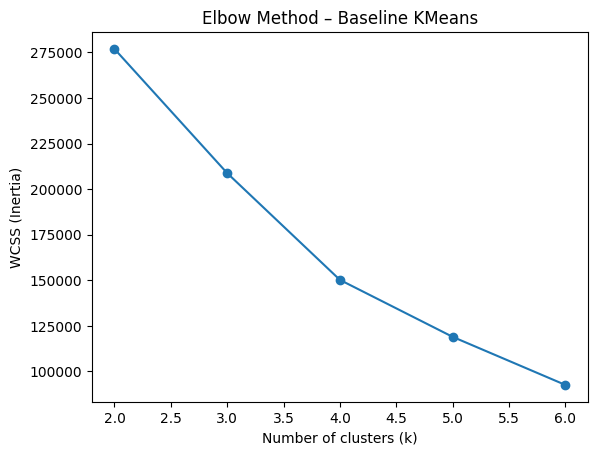

In [ ]:
plt.figure()
plt.plot(range(2, 7), wcss_raw, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method – Baseline KMeans")
plt.show()


In [ ]:
kmeans_raw = KMeans(n_clusters=3, random_state=42, n_init=10)
df_model['kmeans_raw_cluster'] = kmeans_raw.fit_predict(X_raw_scaled)

sil_raw = silhouette_score(X_raw_scaled, df_model['kmeans_raw_cluster'])
sil_raw


np.float64(0.7680676245417237)

In [ ]:
df_model.groupby('kmeans_raw_cluster')[features_raw].mean()


Active Users     Favorites  Total Visits  Server Size
kmeans_raw_cluster                                                        
0                    15023.669524  1.135510e+06  5.380136e+08    19.471830
1                   108029.625234  1.354730e+07  1.136241e+10    38.055743
2                    11792.387978  7.143273e+05  1.973049e+08   698.213115

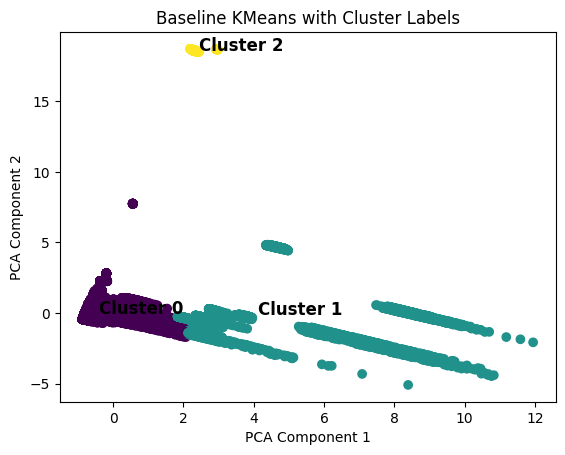

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# PCA projection
pca = PCA(n_components=2)
X_raw_pca = pca.fit_transform(X_raw_scaled)

plt.figure()
plt.scatter(
    X_raw_pca[:, 0],
    X_raw_pca[:, 1],
    c=df_model['kmeans_raw_cluster']
)

# Compute cluster centers in PCA space
centers = []
for cluster_id in np.unique(df_model['kmeans_raw_cluster']):
    points = X_raw_pca[df_model['kmeans_raw_cluster'] == cluster_id]
    centers.append(points.mean(axis=0))

centers = np.array(centers)

# Add labels
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f"Cluster {i}",
             fontsize=12, weight='bold')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Baseline KMeans with Cluster Labels")
plt.show()


***Optimized Kmeans with ratio***

In [ ]:
df_ratio = df_model.copy()

df_ratio['favorites_per_visit'] = df_ratio['Favorites'] / df_ratio['Total Visits']
df_ratio['active_per_visit'] = df_ratio['Active Users'] / df_ratio['Total Visits']

df_ratio = df_ratio.replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:
features_ratio = [
    'Active Users',
    'Favorites',
    'Total Visits',
    'Server Size',
    'favorites_per_visit',
    'active_per_visit'
]

X_ratio = df_ratio[features_ratio]


In [ ]:
scaler_ratio = StandardScaler()
X_ratio_scaled = scaler_ratio.fit_transform(X_ratio)


In [ ]:
wcss_ratio = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_ratio_scaled)
    wcss_ratio.append(km.inertia_)


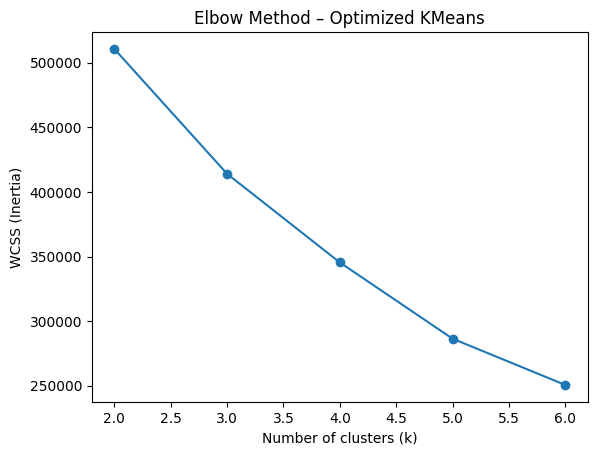

In [ ]:
plt.figure()
plt.plot(range(2, 7), wcss_ratio, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method – Optimized KMeans")
plt.show()


In [ ]:
kmeans_ratio = KMeans(n_clusters=3, random_state=42, n_init=10)
df_ratio['kmeans_ratio_cluster'] = kmeans_ratio.fit_predict(X_ratio_scaled)

sil_ratio = silhouette_score(
    X_ratio_scaled,
    df_ratio['kmeans_ratio_cluster']
)
sil_ratio


np.float64(0.5891984148008855)

In [ ]:
df_ratio.groupby('kmeans_ratio_cluster')[features_ratio].mean()


Active Users     Favorites  Total Visits  Server Size  \
kmeans_ratio_cluster                                                           
0                      15511.757136  1.232690e+06  5.865036e+08    19.932298   
1                     106447.236149  1.334173e+07  1.118341e+10    48.754187   
2                       9702.436129  6.650018e+04  4.678363e+06    14.929020   

                      favorites_per_visit  active_per_visit  
kmeans_ratio_cluster                                         
0                                0.004270          0.000169  
1                                0.001590          0.000028  
2                                0.017044          0.002393

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# remove any broken PCA columns
for col in ['PCA1','PCA2','PCA3']:
    if col in df_ratio.columns:
        df_ratio.drop(columns=col, inplace=True)


df_ratio = df_ratio.reset_index(drop=True)

pca = PCA(n_components=3)
X_ratio_pca = pca.fit_transform(X_ratio_scaled)

pca_df = pd.DataFrame(
    X_ratio_pca,
    columns=['PCA1', 'PCA2', 'PCA3']
)

df_ratio = pd.concat([df_ratio, pca_df], axis=1)

centers = []

for cluster_id in sorted(df_ratio['kmeans_ratio_cluster'].unique()):
    cluster_points = df_ratio[df_ratio['kmeans_ratio_cluster']==cluster_id][['PCA1','PCA2','PCA3']]
    centers.append(cluster_points.mean().values)

centers = np.array(centers)

fig = px.scatter_3d(
    df_ratio,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='kmeans_ratio_cluster',
    title="Optimized KMeans Clusters (3D PCA)"
)

labels = {
    0: "Mid-tier",
    1: "Mainstream",
    2: "Niche Loyal"
}

for i, center in enumerate(centers):
    fig.add_scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[center[2]],
        mode='text',
        text=[labels.get(i, f"Cluster {i}")],
        showlegend=False
    )

fig.show()


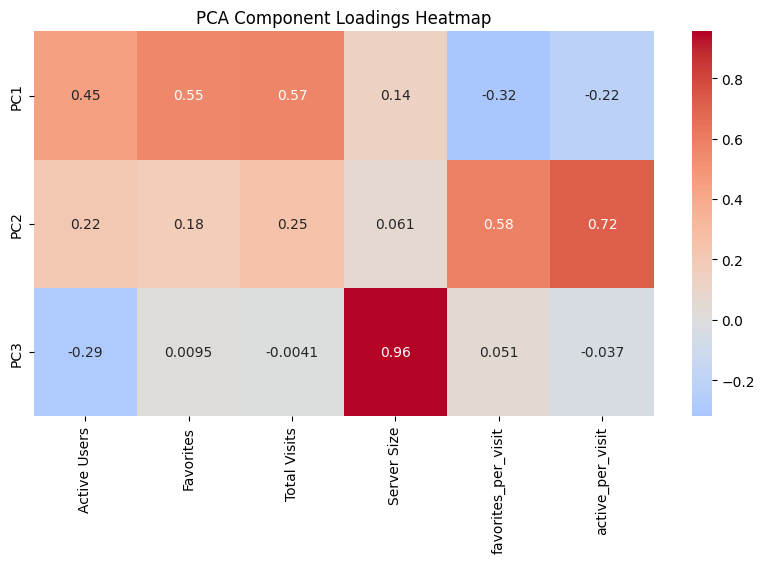

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of PCA components
# Rows = principal components, Columns = original features
pca_components_df = pd.DataFrame(
    pca.components_,
    columns=features_ratio,
    index=['PC1','PC2','PC3']
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    pca_components_df,
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title("PCA Component Loadings Heatmap")
plt.show()
